In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
train = pd.read_csv("D:\\DML\\machine-deep-learning\\Datasets\\train.csv")
test = pd.read_csv("D:\\DML\\machine-deep-learning\\Datasets\\test.csv")


In [3]:
xtrain = train.drop(labels=['label'], axis=1)
ytrain = train['label']


In [4]:
xtrain.shape


(42000, 784)

In [5]:
xtrain = xtrain.values.reshape(-1, 28, 28, 1)
xtrain.shape


(42000, 28, 28, 1)

In [6]:
ytrain.shape


(42000,)

In [7]:
numClass = ["Zero", "One", "Two", "Three", "Four",
            "Five", "Six", "Seven", "Eight", "Nine"]


In [8]:
def ShowNumber(X, Y, index):
    plt.figure(figsize=(14, 2))
    plt.xlabel(numClass[Y[index]])
    plt.imshow(X[index])


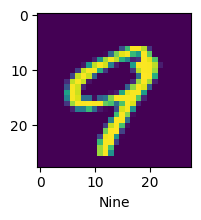

In [9]:
ShowNumber(xtrain, ytrain, 100)


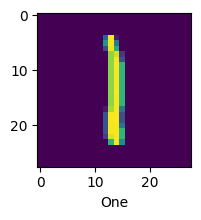

In [10]:
ShowNumber(xtrain, ytrain, 1000)


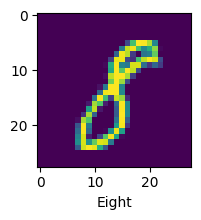

In [11]:
ShowNumber(xtrain, ytrain, 5000)


In [12]:
ytrain = ytrain.values.reshape(-1,)
ytrain[:5]


array([1, 0, 1, 4, 0], dtype=int64)

In [13]:
xtrain = xtrain / 255.0


In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    xtrain, ytrain, test_size=0.2, random_state=42)


In [15]:
print("X train: ", Xtrain.shape)
print("Y train: ", ytrain.shape)
print("X test: ", Xtest.shape)
print("Y test: ", ytest.shape)


X train:  (33600, 28, 28, 1)
Y train:  (33600,)
X test:  (8400, 28, 28, 1)
Y test:  (8400,)


## Convolutional Neural Network(CNN)


In [16]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  input_shape=(28, 28, 1), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])


In [17]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [18]:
model.fit(Xtrain, ytrain, epochs=5)


Epoch 1/5
1050/1050 [==============================] - 22s 19ms/step - loss: 0.1920 - accuracy: 0.9420
Epoch 2/5
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0586 - accuracy: 0.9818
Epoch 3/5
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0415 - accuracy: 0.9871
Epoch 4/5
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0298 - accuracy: 0.9909
Epoch 5/5
1050/1050 [==============================] - 25s 24ms/step - loss: 0.0230 - accuracy: 0.9927


In [19]:
model.evaluate(Xtest, ytest)


263/263 [==============================] - 3s 10ms/step - loss: 0.0430 - accuracy: 0.9879


[0.043033622205257416, 0.9878571629524231]

In [20]:
ypredict = model.predict(Xtest)
predictedNumbers = [np.argmax(num) for num in ypredict]
predictedNumbers[:5]


263/263 [==============================] - 3s 9ms/step


[8, 1, 9, 9, 8]

In [21]:
numClass[predictedNumbers[0]]


'Eight'

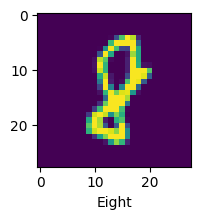

In [22]:
ShowNumber(Xtest, ytest, 0)


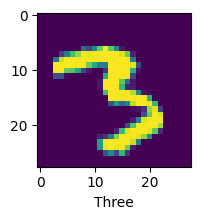

In [23]:
ShowNumber(Xtest, ytest, 6000)


In [53]:
def FirstTenNumbers(X,Y,numsPredict):
  
    for num in numsPredict:
        plt.figure(figsize=(14, 2))
        plt.xlabel(numClass[Y[num]])
        plt.imshow(X[num])


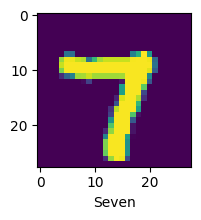

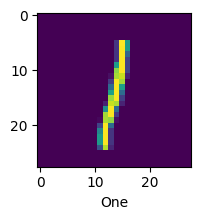

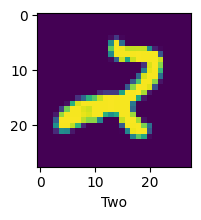

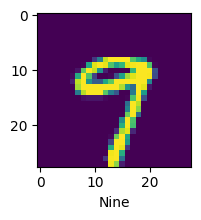

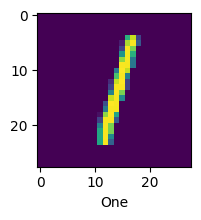

In [56]:
Predictnums = predictedNumbers[73:78]
FirstTenNumbers(Xtest,ytest,Predictnums)
